In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.data.shape

D:\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)

In [3]:
import matplotlib.pyplot as plt
def display_sample(num):

    image = mnist.data[num].reshape([28,28])
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
display_sample(147)

KeyError: 147

In [4]:
from sklearn import datasets

In [5]:
# 加载数据集
digits = datasets.load_digits()

(-0.5, 7.5, 7.5, -0.5)

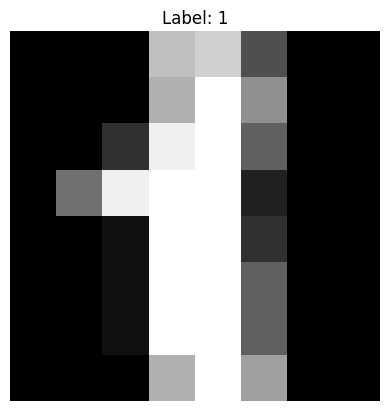

In [18]:
# 选择要查看的图像索引
image_index = 1  # 这里选择索引为0的图像 

# 获取图像数据和标签
image = digits.images[image_index]
label = digits.target[image_index]

# 绘制图像
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')

In [8]:
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# 逻辑回归 - 不使用PCA
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train)
score_without_pca = lr.score(x_test_scaled, y_test)

# 应用PCA
pca = PCA(n_components=0.97) # 保留97%的方差
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# 逻辑回归 - 使用PCA
lr_pca = LogisticRegression()
lr_pca.fit(x_train_pca, y_train)
score_with_pca = lr_pca.score(x_test_pca, y_test)

print("Accuracy without PCA:", score_without_pca)
print("Accuracy with PCA:", score_with_pca)

Accuracy without PCA: 0.9611111111111111
Accuracy with PCA: 0.9722222222222222


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import datasets